<a href="https://colab.research.google.com/github/dzailz/MFoML/blob/main/Katin_V_V_MFoML_Pracrice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, make_circles

from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report

In [2]:
from random import choice
def random_color() -> str:
    return "#" + "".join([choice('0123456789ABCDEF') for j in range(6)])

In [3]:
from typing import Any
from pandas.core.api import DataFrame
def pd_read_csv(file: Any, delimiter: str = ",") -> DataFrame:
    return pd.read_csv(file, delimiter = delimiter)

In [4]:
def show_matshow(Z, title: str, cmap="Greys"):
    fig = plt.figure(figsize=(20, 10))
    for i in range(0, 5):
        ax = fig.add_subplot(2, 5, i + 1)
        ax.set_title(title, size=20)  
        ax.matshow(1 - Z[i + n, :].reshape((28, 28)).astype(float), cmap=cmap, vmin=0, vmax=1)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)

In [5]:
plt.style.use('dark_background')

# 1. Метод главных компонент

## 1.1. Cинтетические данные

### 1.1.1 Генерация данных

In [6]:
def create_elipsoid_data(
    C1=0, C2=0, # координаты центра
    S1=5, S2=1, # радиусы эллипса
    theta=45, # угол наклона
    N=250, # число точек
    random_state=42 # фиксируем "случайность"
    ): 
    
    np.random.seed(random_state)
    
    theta = np.pi*theta / 180
    Centers = np.array([C1,C2])
    Sigmas = np.array([S1,S2])

    R = np.array([[np.cos(theta), - np.sin(theta)],
                [np.sin(theta), np.cos(theta)]]) 

    return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T

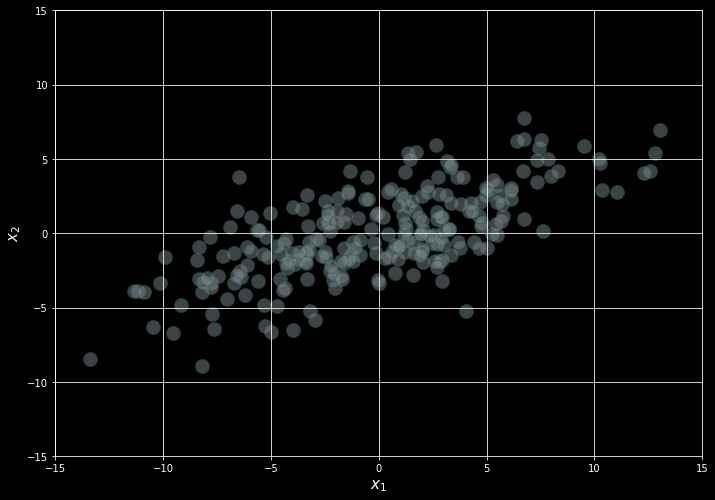

In [7]:
X = create_elipsoid_data(C1=0, C2=0, S1=6, S2=2, theta=25) 

fig  = plt.figure(figsize=(10,7))
plt.scatter(X[:, 0],X[:, 1], alpha = 0.5, s = 196, c=random_color(), edgecolor=random_color());
plt.grid()

plt.xlabel(r'$x_1$',fontsize=15)
plt.ylabel(r'$x_2$',fontsize=15)
plt.xticks(FontSize = 10)
plt.yticks(FontSize = 10)
plt.tight_layout()
plt.xlim((-15,15))
plt.ylim((-15,15));

### 1.1.2. Применение метода главных компонент

In [8]:
class PCA1:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):
        """
        Шаг 1 Считаем матрицу ковариации
        Шаг 2 Сортируем по возрастанию
        Шаг 3 Берём первые n главных компонент
        """
        self.mean = np.mean(X, axis=0)
        # шаг 1
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        # шаг 2
        idx = eigenvalues.argsort()[::-1]   
        # шаг 3
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.', label="Все собственные значения", linewidth = 3)
        plt.plot(
            self.values[:self.n_components],
            "r-o",
            label="Собственное Пространство",
            markersize=10,
            mfc="none",
            linewidth=2,
            alpha=0.8)
        plt.ylabel("собственные\n значения", fontsize=15)
        plt.grid()
        plt.legend(fontsize=15)
        plt.xticks(FontSize=15) 
        plt.yticks(FontSize=15)
        plt.tight_layout()    

In [9]:
pca = PCA1(n_components = 2)

In [10]:
pca.fit(X)
pca.score(X)

1.0

### 1.1.3. Визуализируем пространство главных компонент

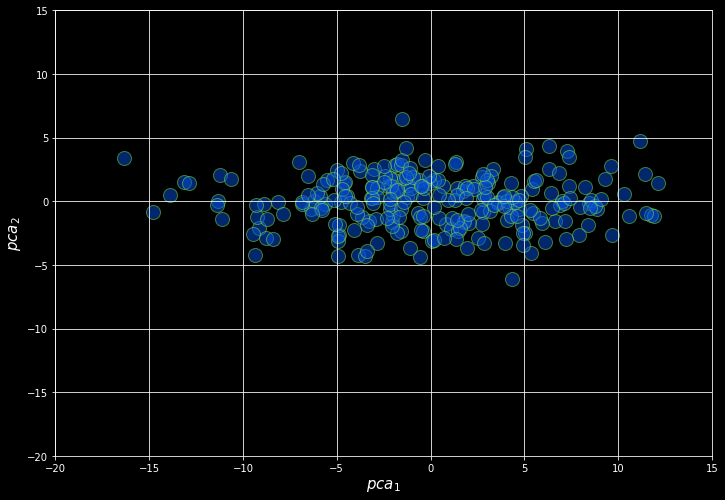

In [11]:
X_new = pca.transform(X)

fig  = plt.figure(figsize=(10,7))

plt.scatter(X_new[:, 0],X_new[:, 1], alpha=0.5, s=196, c=random_color(), edgecolor=random_color());
plt.grid()
plt.xlabel(r"$pca_1$",fontsize=15)
plt.ylabel(r"$pca_2$",fontsize=15)
plt.xticks(FontSize = 10)
plt.yticks(FontSize = 10);
plt.tight_layout()
plt.xlim((-20,15))
plt.ylim((-20,15));

In [12]:
eigen_vectors = pca.components
eigen_values = pca.values

In [13]:
print(f"Собственные векторы: {np.ndarray.tolist(eigen_vectors)}\nСобственные значения: {eigen_values}")

Собственные векторы: [[-0.9091250843428964, 0.41652320585835473], [-0.41652320585835473, -0.9091250843428964]]
Собственные значения: [33.59868601  3.98326799]


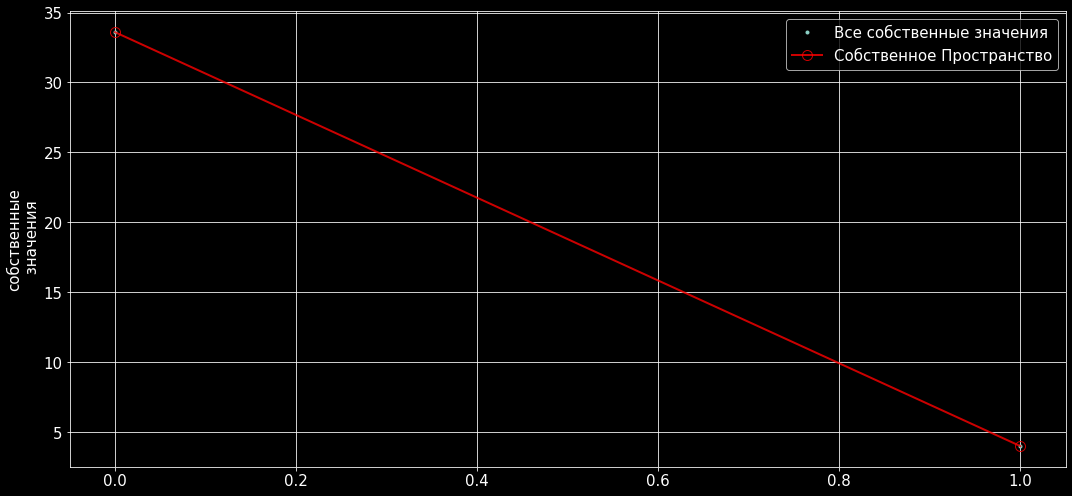

In [14]:
pca.plot_eigvalues();

Оценим полезную информацию, которую показывают собственне значения. Для этого посмотрим разброс значений для каждой из компонент.


In [15]:
print("Доля полезной информации: ", [i / sum(eigen_values) * 100 for i in eigen_values])

Доля полезной информации:  [89.4011152594233, 10.598884740576679]


In [16]:
X_mean = np.mean(X, axis = 0)

theta_ = 2 * np.pi * np.arange(0,1,0.01)

X_std = eigen_vectors @ np.diag(np.sqrt(eigen_values)) @ np.array([np.cos(theta_),np.sin(theta_)])

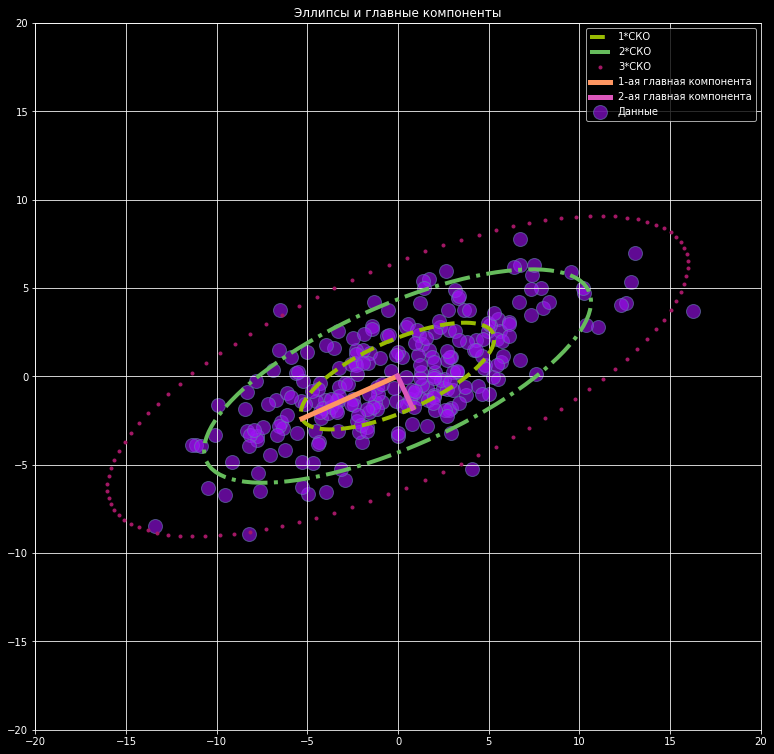

In [17]:
fig = plt.figure(figsize=(13,13))
# рисуем данные
plt.scatter(X[:,0],X[:,1], alpha=0.6, label="Данные", s=196, c=random_color(), edgecolor=random_color())
# рисуем эллипс с "диаметром" ~ 1*СКО
plt.plot(X_std[0, :] + X_mean[0], X_std[1, :] + X_mean[1], "--", c=random_color(), linewidth = 4, label = '1*СКО')
#рисуем эллипс с "диаметром" ~ 2*СКО
plt.plot(2 * X_std[0, :] + X_mean[0], 2 * X_std[1, :] + X_mean[1], "-.", c=random_color(), linewidth=4, label = '2*СКО')
#рисуем эллипс с "диаметром" ~ 3*СКО
plt.plot(3 * X_std[0,:] + X_mean[0], 3 * X_std[1, :] + X_mean[1], ".", c=random_color(), linewidth = 4, label = '3*СКО')
# 1-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0] + eigen_vectors[0, 0] * np.sqrt(eigen_values[0])]),
         np.array([X_mean[1], X_mean[1] + eigen_vectors[1, 0] * np.sqrt(eigen_values[0])]),
         c=random_color(),linewidth = 5, label = '1-ая главная компонента')
# 2-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+eigen_vectors[0,1]*np.sqrt(eigen_values[1])]),
         np.array([X_mean[1], X_mean[1]+eigen_vectors[1,1]*np.sqrt(eigen_values[1])]),
         c=random_color(),linewidth = 5, label = '2-ая главная компонента')
plt.xlim((-20,20))
plt.ylim((-20,20))
plt.title('Эллипсы и главные компоненты')
plt.legend()
plt.grid()

In [18]:
X_new[:5, 0], X_new[:5, 1], X_new.shape

(array([-3.01190378,  0.82714003, -3.87229789, -9.13886117,  1.36973124]),
 array([ 2.53379897, -1.7980127 , -4.23821123, -2.09414409,  3.08020441]),
 (250, 2))

Преобразование от осей координат данных к главным осям представляет собой аффинное преобразование и состоит из сдвига, вращения и пропорционального масштабирования

## 1.2. Набор данных MNIST

In [19]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X = X / 255.
X_ = X.values

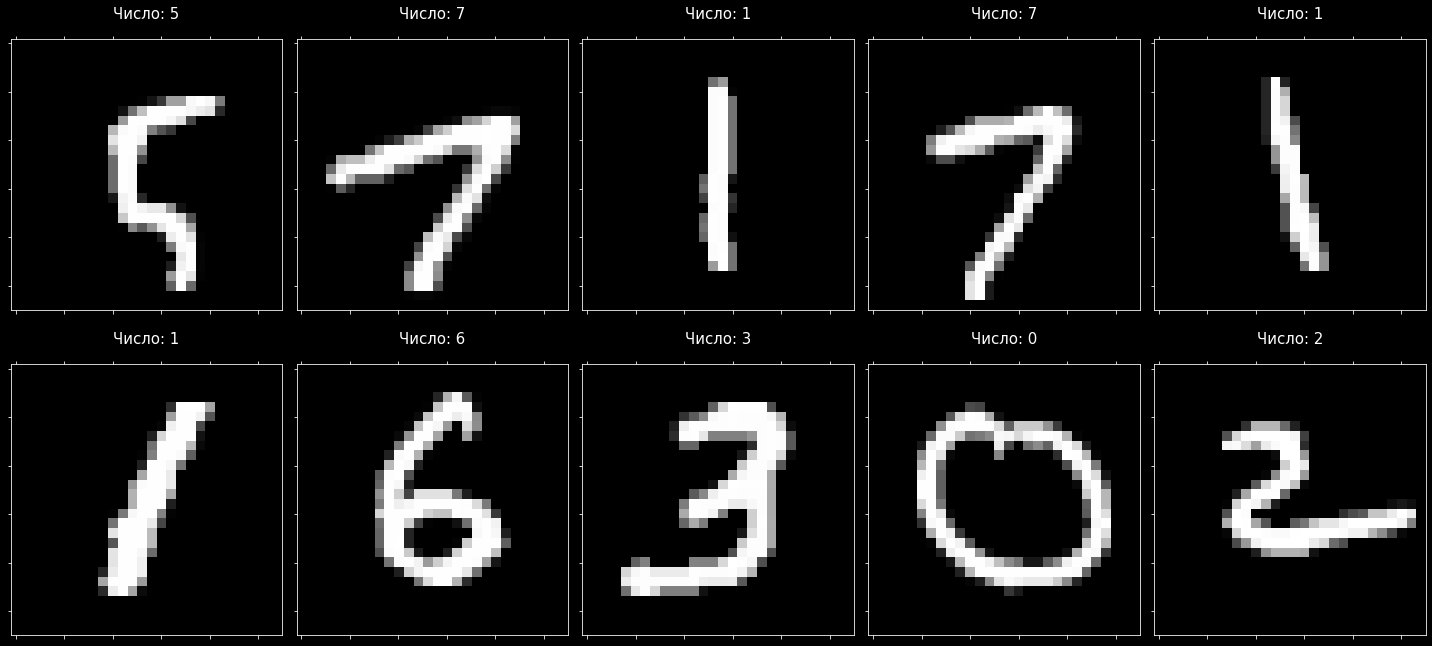

In [20]:
n = 100
fig = plt.figure(figsize=(20, 10) )
for i in range(0, 10):
  ax = fig.add_subplot(2, 5, i + 1)
  ax.set_title(f"Число: {y[i+n]}", size=15)
  ax.matshow(1 - X.loc[i + n, "pixel1": "pixel784"].values.reshape((28,28)).astype(float), cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()

###  1.2.1. Метод Главных Компонент - 150

In [21]:
pca = PCA1(n_components=150)
pca.fit(X_)
pca.score(X_)

0.9635915926454999

In [22]:
pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)
pca_inverse.shape

(70000, 784)

Визуализируем собственные значения

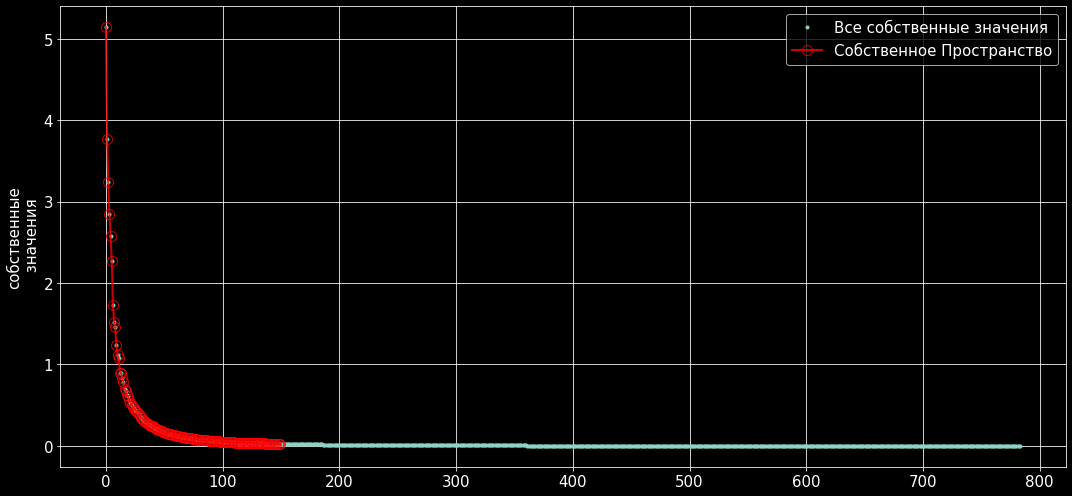

In [23]:
pca.plot_eigvalues();

Восстановление данных

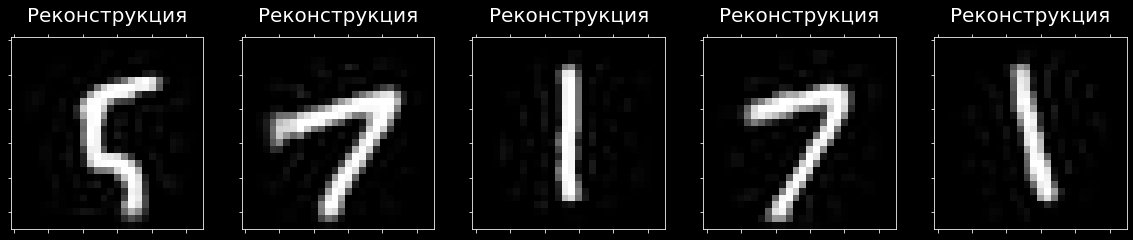

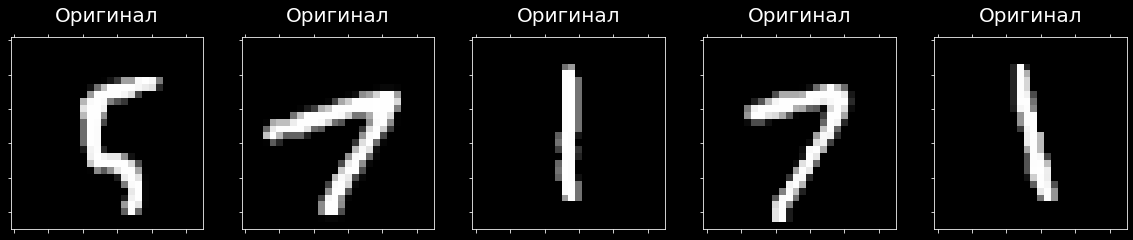

In [24]:
show_matshow(Z=pca_inverse, title="Реконструкция")
show_matshow(Z=X_, title="Оригинал")

###  1.2.2. Метод Главных Компонент - 20

#### Уменьшим количество компонент до 20

In [25]:
pca = PCA1(n_components=20)
pca.fit(X_)
pca.score(X_)

0.7487442704480831

Видно, что оценка ниже

In [26]:
pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)
pca_inverse.shape

(70000, 784)

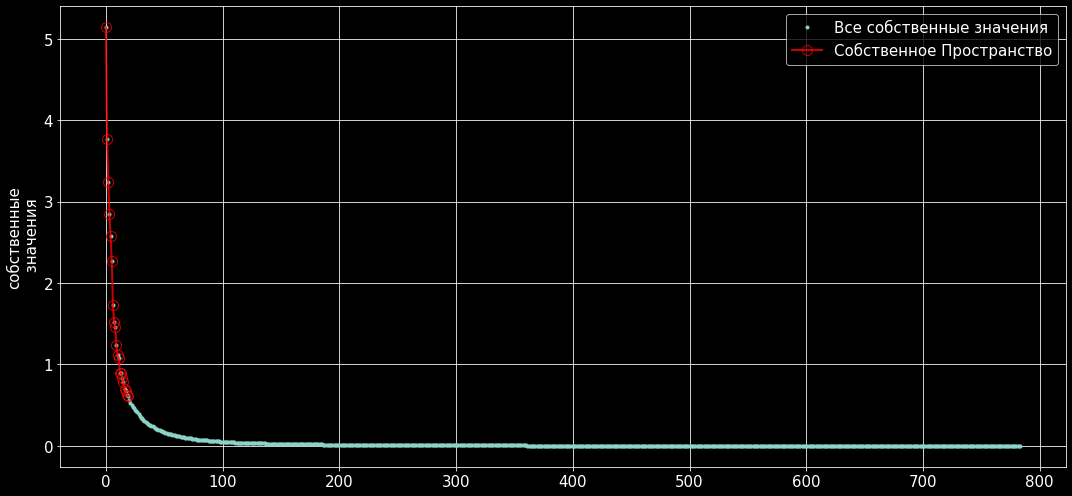

In [27]:
pca.plot_eigvalues();

На графике видно, что не захватываются значительное количество данных

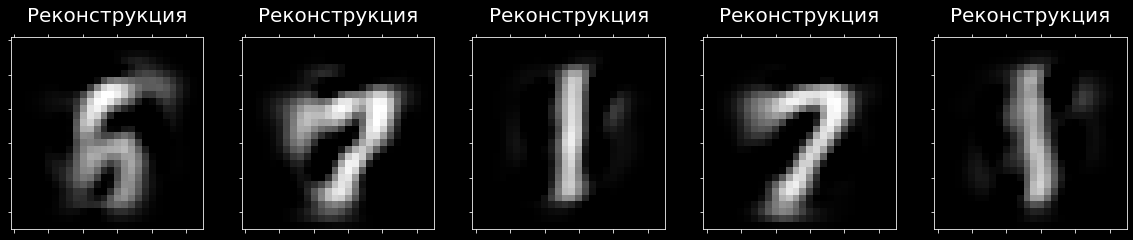

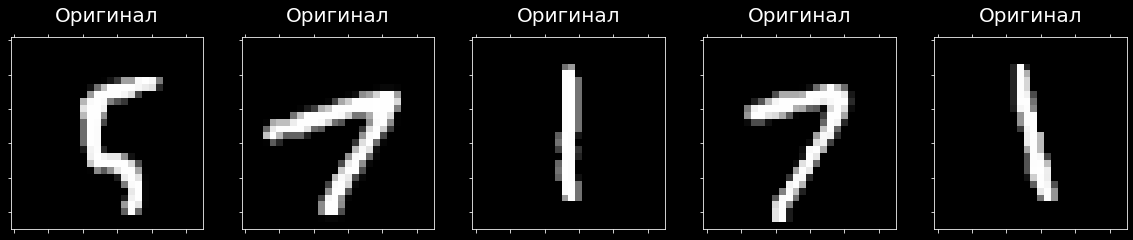

In [28]:
show_matshow(Z=pca_inverse, title="Реконструкция")
show_matshow(Z=X_, title="Оригинал")

Качество восстановления ухудшилось например даже визуально можно спутать 5 с 6

###  1.2.3. Определим оптимальное число компонент при заданной точности

In [29]:
def PCA_opt(F, varRetained = 0.95, show = False):
    """
    :F: Исходная матрица
    :U: Матрица
    :V: Матрица
    :d: Массив
    :m: Необходимое число главных компонент
    
    Вычисление собственных векторов и значений (SVD)
    Sigma = U * np.diag(d) * V
    """
    (n, l) = F.shape
    
    Sigma = 1.0 / l * F.dot(np.transpose(F))

    U, d, V = np.linalg.svd(Sigma, full_matrices=True)


    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / dTot * 100.0 for i in range(n)])

    m = 0
    while var_i[m] <= varRetained * 100:
        m = m + 1
    print("Выполняется Анализ основных компонент")
    print("Возвращает число главных компонент и точность, которая достигается при нём")
    print("%.2f %% variance retained in %d dimensions" % (var_i[m], m))

    if show:
        plt.plot(var_i)
        plt.xlabel("Количество функций")
        plt.ylabel("Сохраненная процентная разница")
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    U_reduced = U[:, : m + 1]
    # G = вычислить матрицу в преобразованном пространстве
    G = U_reduced.dot(np.diag(d[:m + 1]))

    return G, U_reduced

Выполняется Анализ основных компонент
Возвращает число главных компонент и точность, которая достигается при нём
95.02 % variance retained in 101 dimensions


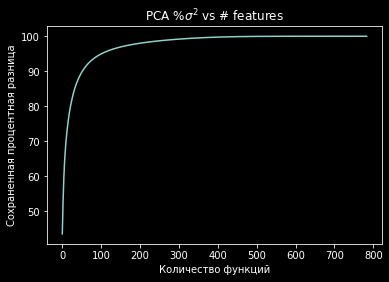

In [30]:
Z, U_reduced = PCA_opt(X_.T, varRetained = 0.95, show = True)

Протестируем значение которое выявил алгоритм

###  1.2.4. Метод Главных Компонент - 101

In [31]:
pca = PCA1(n_components=101)
pca.fit(X_)
pca.score(X_)

0.9405569377388024

In [32]:
pca_result_mnist = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result_mnist)
pca_inverse.shape

(70000, 784)

Визуализируем собственные значения

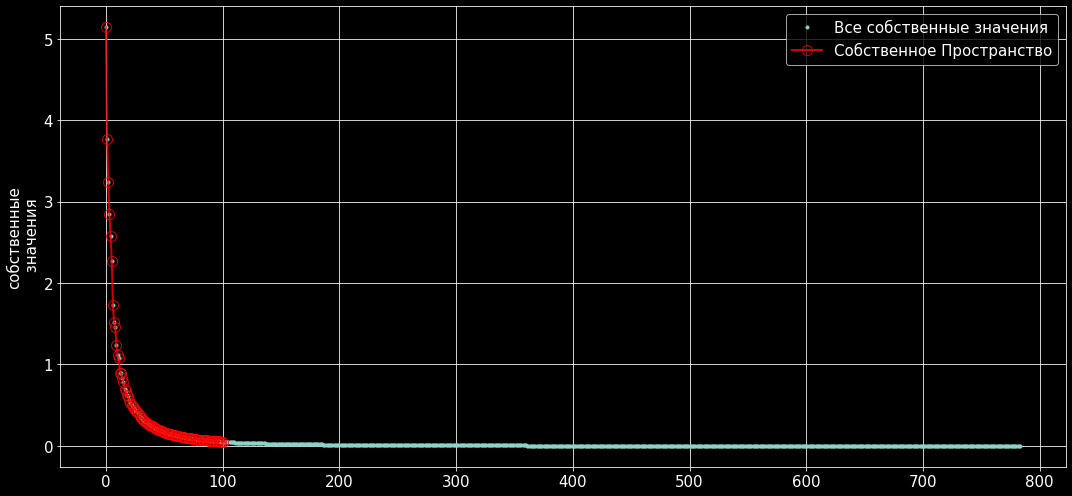

In [33]:
pca.plot_eigvalues();

Восстановление данных

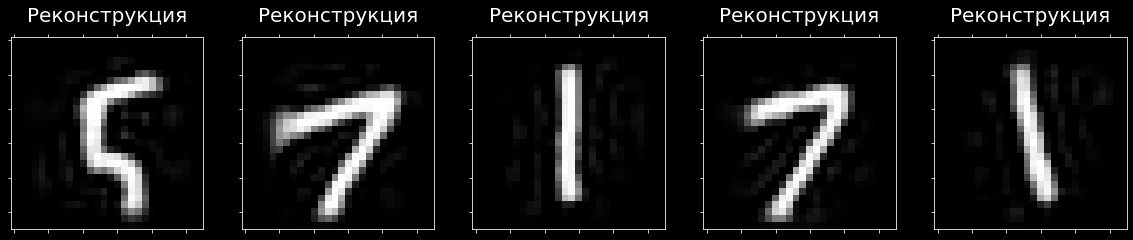

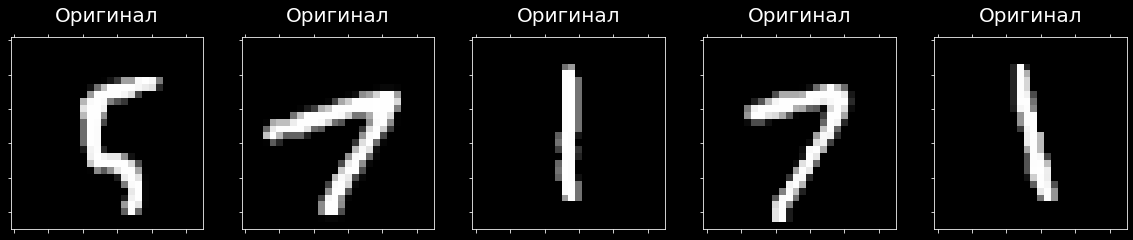

In [34]:
show_matshow(Z=pca_inverse, title="Реконструкция")
show_matshow(Z=X_, title="Оригинал")

С помощью алгоритма удалось подобрать оптимальное значение компонент

### 1.2.5 Визуализируем пространство главных компонент

In [35]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    labels = [["", names[1]], ["", ""], [names[0], names[3]], [names[2], ""]]
    fig, sub = plt.subplots(2, 2, figsize=(20, 20))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:, axi[0]], data[:, axi[1]],
                             c=y, s=36, cmap="tab10",
                             alpha=0.7, facecolors="none")
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis="x", labelsize= 15)
        ax.tick_params(axis="y", labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

In [36]:
pca_names = [str(x + 1) + " Главная Компонента" for x in range(4)]

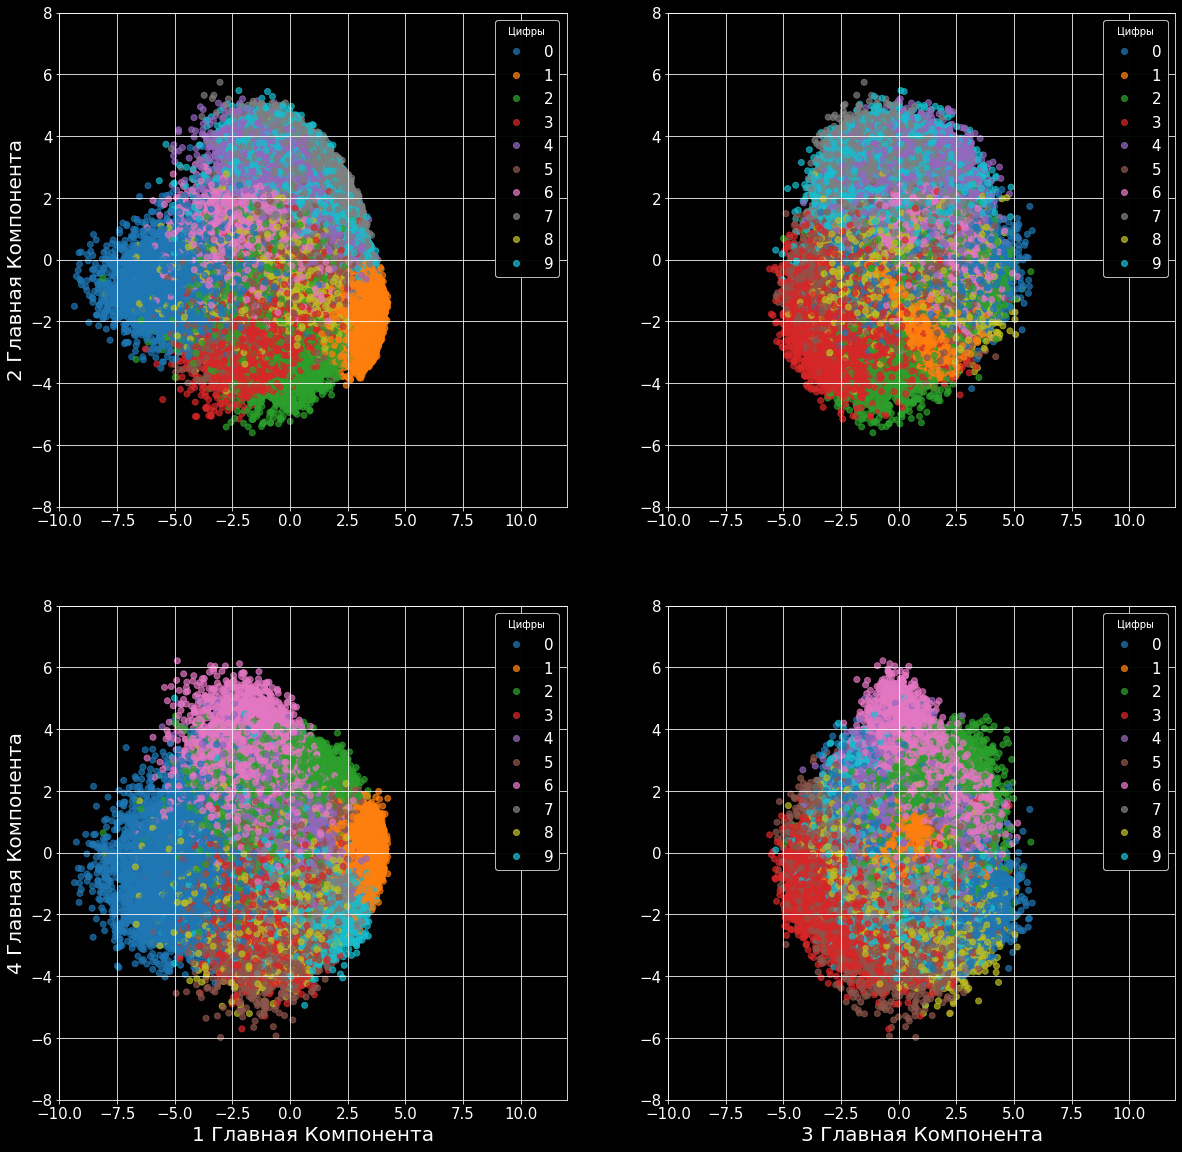

In [37]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

###  1.2.6. В пространстве главных компонент для данных MNIST определите, каким цифрам соответствуют точки со следующими координатами:



```
PCA-1 -7; PCA-2  0 - цифра 0  
PCA-1  4; PCA-4  1 - цифра 1
PCA-3  0; PCA-4  5 - цифра 6
PCA-3 -4; PCA-2 -3 - цифра 3
```



## 1.3. Набор данных Cars Moldova

In [38]:
df = pd_read_csv("https://raw.githubusercontent.com/dzailz/MFoML/main/cars_moldova_num.csv")
df.drop(columns = 'Age')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32595 entries, 0 to 32594
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32595 non-null  int64  
 1   Model                 32595 non-null  int64  
 2   Year                  32595 non-null  int64  
 3   Style                 32595 non-null  int64  
 4   Distance              32595 non-null  float64
 5   Engine_capacity(cm3)  32595 non-null  float64
 6   Fuel_type             32595 non-null  int64  
 7   Transmission          32595 non-null  int64  
 8   Price(euro)           32595 non-null  float64
 9   Age                   32595 non-null  int64  
 10  km_year               32595 non-null  float64
 11  price/km              32595 non-null  float64
 12  luxury                32595 non-null  int64  
 13  eco                   32595 non-null  int64  
 14  relative_age          32595 non-null  int64  
dtypes: float64(5), int6

In [39]:
# Добавим в списки колонки, которые ранее относились к категориальным и числовым признакам
cat_columns = ["Make", "Model", "Style", "Fuel_type", "Transmission", "luxury", "eco", "relative_age"]
num_columns = ["Year", "Distance", "Engine_capacity(cm3)", "Price(euro)", "km_year", "price/km"]

Импортируем PCA из бибилиотеки sklearn

In [40]:
from sklearn.decomposition import PCA

### 1.3.1. Визуализация пространства главных компонент и их связь с исходными признаками

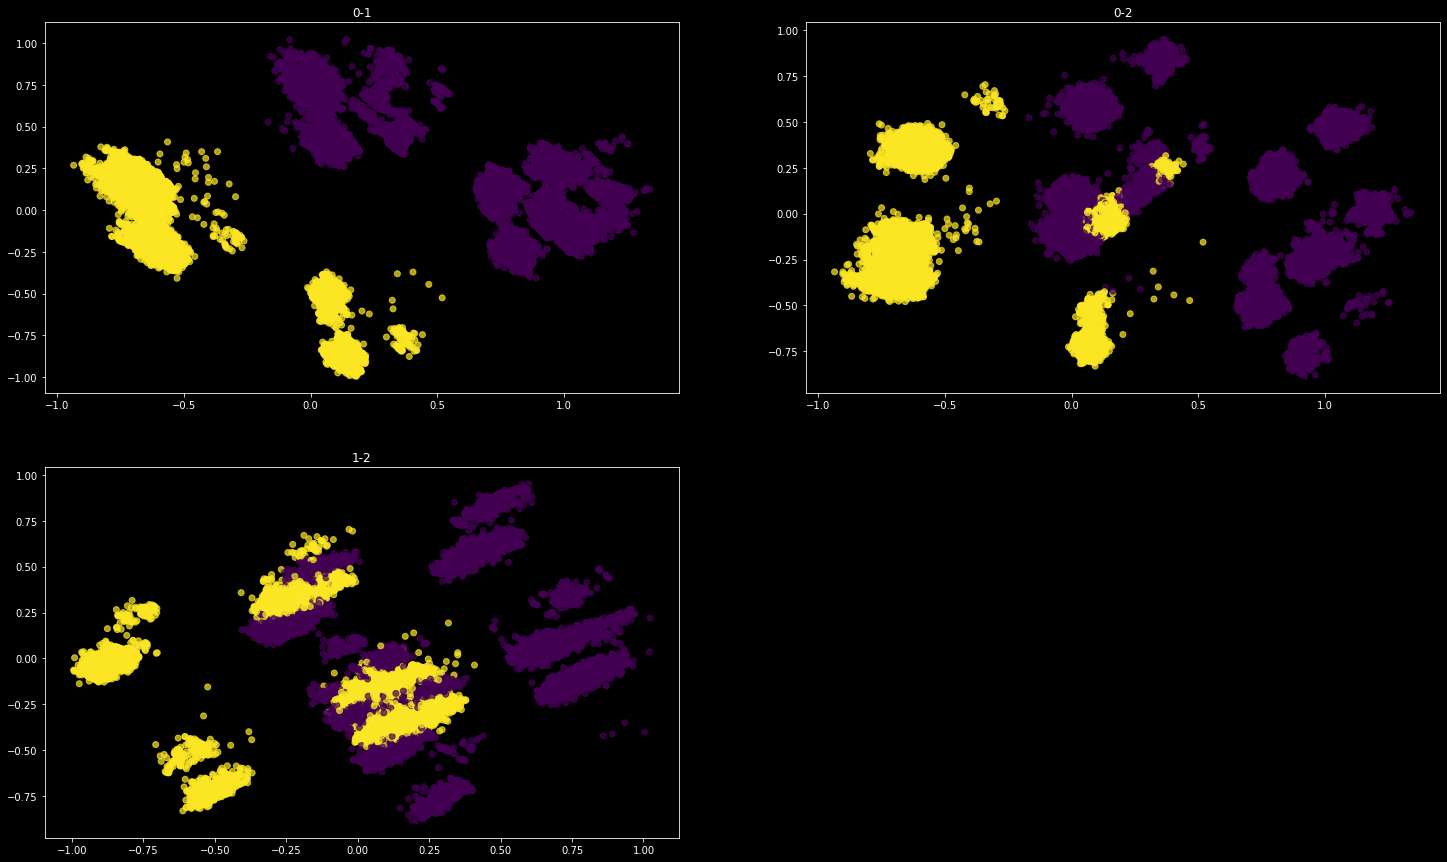

In [41]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
pca = PCA()
labels = df.Transmission

X_new = pca.fit_transform(X)
X_new.shape

plt.figure(figsize=(25,15))
plt.subplot(221)
plt.scatter(X_new[:,0], X_new[:,1], c=labels, alpha=0.7) 
plt.title("0-1")
plt.subplot(222)
plt.scatter(X_new[:,0], X_new[:,2], c=labels, alpha=0.7)
plt.title("0-2")
plt.subplot(223)
plt.scatter(X_new[:,1], X_new[:,2], c=labels, alpha=0.7)
plt.title("1-2")
plt.show();

Визуализируем веса главных компонент.

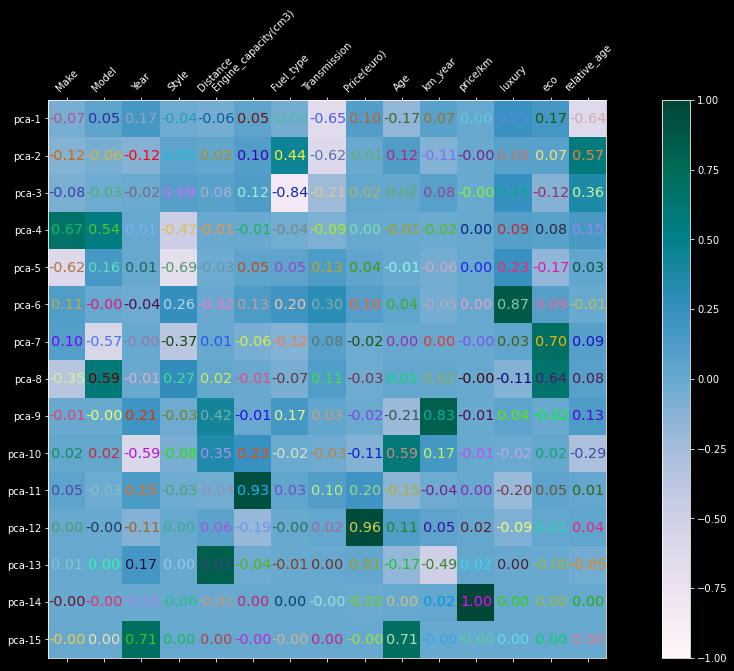

In [42]:
fig=plt.figure(figsize=(20,10))
W = pca.components_
pca_names = ["pca-" + str(x + 1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap="PuBuGn", vmin=-1, vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, "{:0.2f}".format(z), ha="center", va="center", color=random_color(), fontsize="x-large")
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

### 1.3.2.  Применение пространства главных компонент в качестве входных данных для алгоритмов классификации

In [43]:
# Отделим значения от целевого признака. В данном случае Style
X = df.drop(('Style'), axis = 1) 
y = df['Style']
feature_names = X.columns

In [44]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32595, 14)
(32595,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
N_train, _ = X_train.shape 
N_test, _ = X_test.shape 
print(N_train, N_test)

26076 6519


In [46]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [47]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.singular_values_)

[[-2.24900886e-07 -3.46866256e-05 -3.25580793e-05  9.98790152e-01
   6.05531819e-04 -2.48571614e-06  1.04144579e-06 -3.42018037e-02
   3.25580793e-05  3.53284518e-02 -3.91407088e-06 -4.10418874e-07
  -4.05544530e-07  2.18302232e-06]
 [-1.56585804e-04  3.29340505e-04  4.28854864e-04  1.60955207e-02
   2.29622406e-02 -4.31377468e-05 -2.39770745e-05  9.06217663e-01
  -4.28854864e-04  4.21879971e-01  4.39038377e-05  1.73291583e-05
   4.65643031e-06 -2.72111075e-05]]
[9.45005232e+09 8.93579145e+07]
[15697455.66518513  1526436.24836844]


In [48]:
X_train_pca = pca.transform(X_train) # Преобразуем пространство главных компонент
X_test_pca = pca.transform(X_test)
knc = KNeighborsClassifier(n_neighbors = 10, metric='hamming', n_jobs=10)
knc.fit(X_train_pca, y_train)
y_train_predict_pca = knc.predict(X_train_pca)
y_test_predict_pca = knc.predict(X_test_pca)
err_train_pca = np.mean(y_train != y_train_predict_pca)
err_test_pca  = np.mean(y_test  != y_test_predict_pca)
print(f'Mean train accuracy score: {err_train_pca:.3f}')
print(f'Mean test accuracy score: {err_test_pca:.3f}')

Mean train accuracy score: 0.697
Mean test accuracy score: 0.703


# 2. Кластеризация К-средних

## 2.1.  Для синтетических данных

In [49]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [50]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter        
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------    
    def distance(self,X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)  
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)      
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1) 
    #-------------------------------------
    def transform(self,X):
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        
        if self.centroids is None:
            self.centroids = self.init_centroids(X)
    
        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)
            
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                
                c_idxs = np.flatnonzero(cluster_label==k)
                
                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self        
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)

In [51]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):
    
    fig = plt.figure(figsize=(11,10))

    plt.scatter(X[:, 0], X[:, 1], 
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')
    
    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')  

    plt.xticks([])
    plt.yticks([])

### 2.1.1  Генерация данных - Инь-Ян

In [52]:
X_mon, y_mon = make_moons(n_samples=400, noise=0.15, random_state=22)

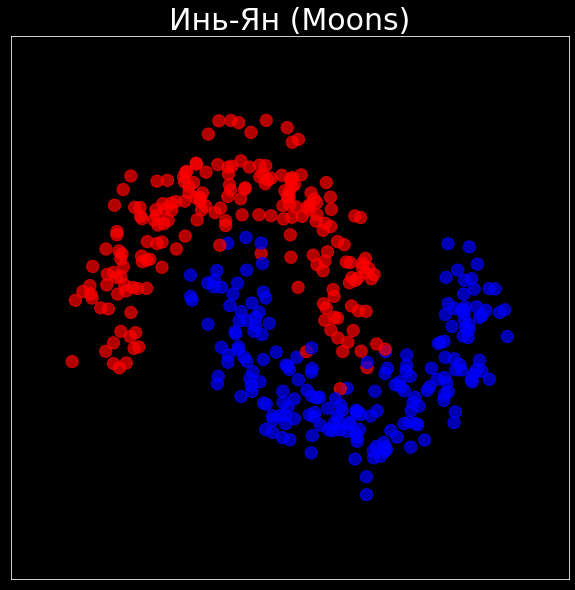

In [53]:
fig = plt.figure(figsize= (10,10))
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_mon, y_mon), 'Инь-Ян (Moons)')

In [54]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)  
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)      
    return dist

Оценка оптимального числа кластеров по методу Локтя

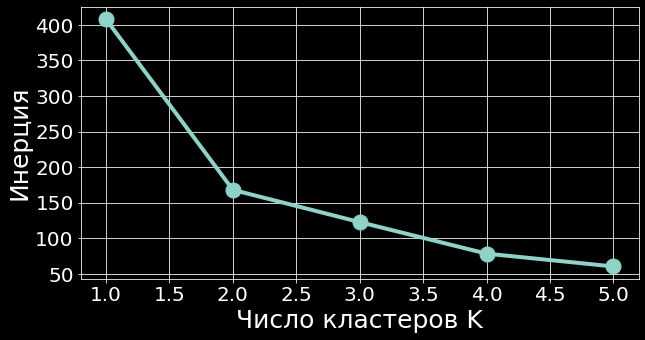

In [55]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mon)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(FontSize = 20)
plt.yticks(FontSize = 20);

Посмотрим для 2 кластеров

Мы остановились на итерации:: 8


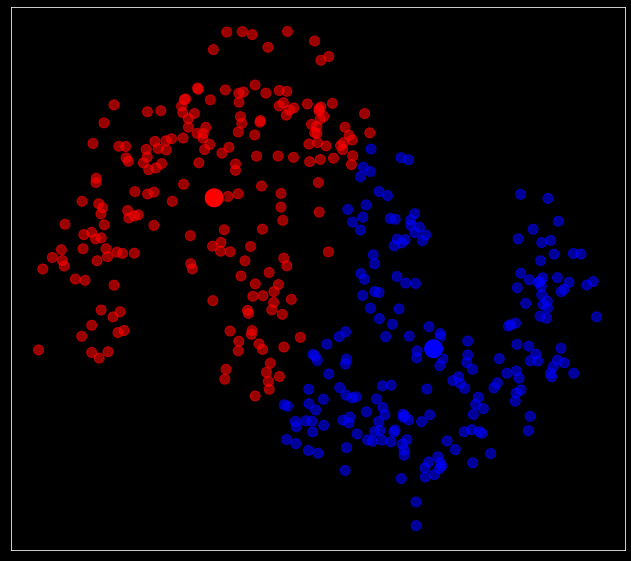

In [56]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_mon)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_mon,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

Посмотрим для 4 кластеров

Мы остановились на итерации:: 25


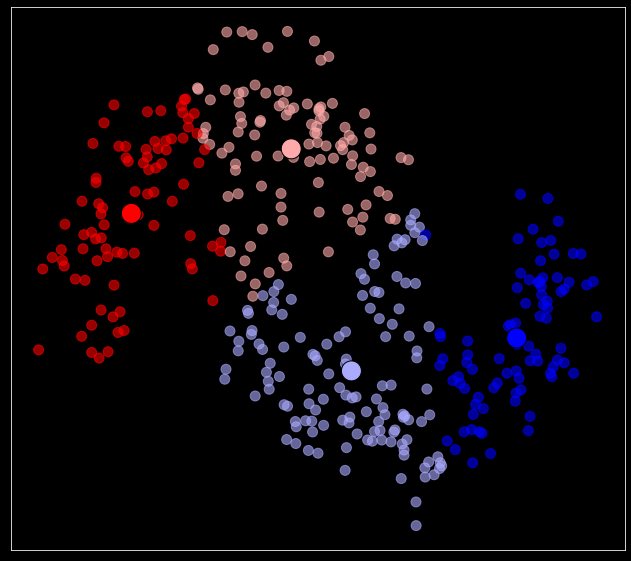

In [57]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_mon)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_mon,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

In [58]:
pd.crosstab(y_mon,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,2,30,89,79
1,81,97,15,7


Видим, что 0 и 1 кластер связаны с 0 меткой, а 2 и 3 с меткой - 1. Однако, кластеры 1 и 2 дают ошибки. С подобными данными кластеризация справляется неидеально.

### 2.1.2 Генерация данных - Круги

In [59]:
X, y = make_circles(n_samples=400, noise=0.12, factor=0.5, random_state=22)

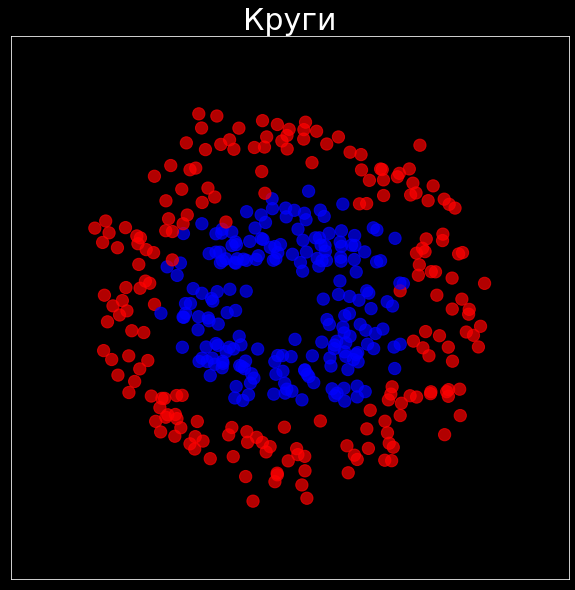

In [60]:
fig = plt.figure(figsize= (10,10))
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X, y), 'Круги')

Оценка оптимального числа кластеров по методу Локтя

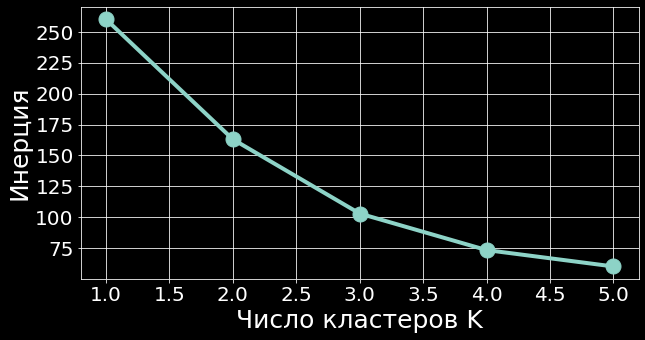

In [61]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(FontSize = 20)
plt.yticks(FontSize = 20);

Метод локтя не дает каких-либо результатов. Поскольку изначально мы подрузумеваем в данных два кластера - попробуем 2

Last iteration: 2


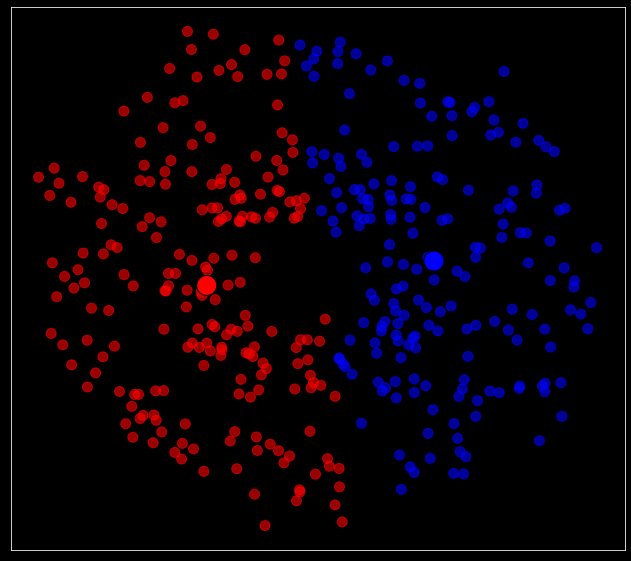

In [62]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Last iteration:', kmeans.iters)


plot_cluster(X, kmeans.centroids, c_labels, np.unique(c_labels))

In [63]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1
Метки,,
0,94,106
1,97,103


Метод кластеризации не способен отделить внутреннюю окружность от внешней, данные распределены равномерно от центра. Метки равномерно смешаны по  кластерам.

## 2.2. Для набора данных MNIST

In [64]:
X_m, y_m  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.2, random_state=22)

In [66]:
knc = KNeighborsClassifier(n_neighbors=7)

### Обучаем модель

In [67]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [68]:
y_pred = knc.predict(X_test)
y_pred

array(['6', '8', '8', ..., '5', '5', '6'], dtype=object)

In [69]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1382
           1       0.95      0.99      0.97      1582
           2       0.98      0.96      0.97      1378
           3       0.96      0.97      0.96      1401
           4       0.98      0.97      0.97      1351
           5       0.96      0.96      0.96      1269
           6       0.98      0.99      0.98      1356
           7       0.96      0.97      0.97      1494
           8       0.99      0.93      0.96      1390
           9       0.95      0.97      0.96      1397

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



<Figure size 720x576 with 0 Axes>

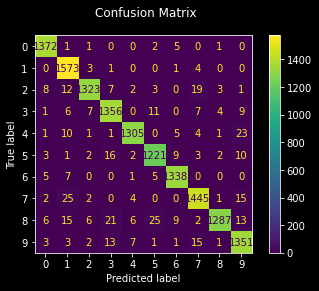

In [70]:
fig = plt.figure(figsize= (10,8))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [71]:
ma_score = knc.score(X_test, y_test)
print(f'Mean accuracy score:, {ma_score:.3f}')

Mean accuracy score:, 0.969


## 2.3. Для набора данных Cars Moldova

Стандартизируем данные

In [72]:
df_std = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_std[num_columns] = (df[num_columns] - M) / STD

df_std.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,price/km,luxury,eco,relative_age
0,40,93,0.371579,4,0.137604,-0.073059,2,0,-0.180885,11,0.384365,-0.051813,0,1,1
1,31,62,0.787743,11,-0.480459,-0.543659,0,1,-0.097067,8,0.268438,-0.045889,0,0,0
2,31,71,0.510300,11,-0.737985,-0.543659,0,1,-0.306611,10,-0.530687,-0.046840,0,0,0
3,28,23,-0.322027,11,0.189109,-0.386793,3,1,-0.563301,16,-0.326655,-0.056645,0,0,1
4,23,127,-1.154355,5,1.219213,0.554408,0,1,-0.627212,22,-0.172085,-0.058872,0,0,1


Карта корреляции

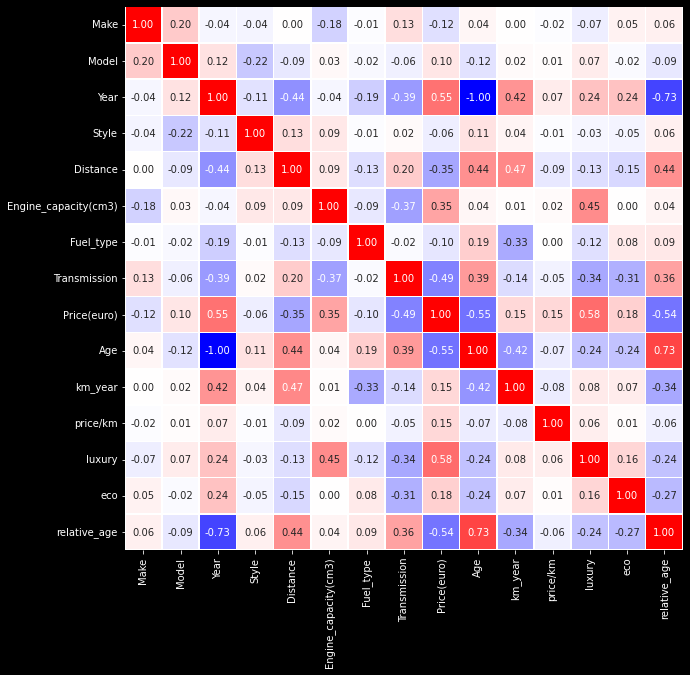

In [73]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_std.corr(), cmap='bwr', annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [74]:
df_std['Transmission'].unique()

array([0, 1])

In [75]:
y = df_std['Transmission']

In [76]:
x = df_std.drop(columns = ['Transmission'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26076, 14), (6519, 14), (26076,), (6519,))

In [78]:
from sklearn.cluster import KMeans

Вычислить кластеризацию k-средних.

In [79]:
wcss = []
x = x.to_numpy()

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

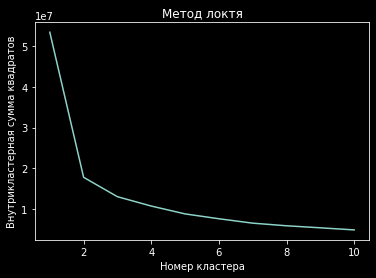

In [80]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('Внутрикластерная сумма квадратов') 
plt.show()

Явный перелом наступает на 2-х кластерах

In [81]:
kmeans = KMeans(n_clusters= 2, init='k-means++', max_iter=300, n_init=10, random_state=22)
y_kmeans = kmeans.fit(x)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
Z = y_kmeans.predict(x)
df_std['Cluster'] = Z
df_std.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,price/km,luxury,eco,relative_age,Cluster
0,40,93,0.371579,4,0.137604,-0.073059,2,0,-0.180885,11,0.384365,-0.051813,0,1,1,0
1,31,62,0.787743,11,-0.480459,-0.543659,0,1,-0.097067,8,0.268438,-0.045889,0,0,0,1
2,31,71,0.510300,11,-0.737985,-0.543659,0,1,-0.306611,10,-0.530687,-0.046840,0,0,0,0
3,28,23,-0.322027,11,0.189109,-0.386793,3,1,-0.563301,16,-0.326655,-0.056645,0,0,1,1
4,23,127,-1.154355,5,1.219213,0.554408,0,1,-0.627212,22,-0.172085,-0.058872,0,0,1,0


In [82]:
df_std.groupby(["Cluster"]).agg(Cluster_Dim=("Cluster", "count")).reset_index().sort_values(by="Cluster_Dim", ascending=False)

,Cluster,Cluster_Dim
0,0,19119
1,1,13476


In [84]:
rating_cluster = df_std.groupby("Cluster").mean().reset_index().sort_values(by="Transmission", ascending=False)
rating_cluster.T

,1,0
Cluster,1.000000,0.000000
Make,22.074206,25.448768
Model,34.026195,101.111617
Year,-0.106627,0.075156
Style,8.104037,7.121450
Distance,0.097298,-0.068580
Engine_capacity(cm3),-0.025809,0.018192
Fuel_type,1.912734,1.874418
Transmission,0.560255,0.529630
Price(euro),-0.091536,0.064519
